<a href="https://colab.research.google.com/github/lovgon/stepik-fast-start_to_AI/blob/main/3_1_NLP_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Предобработка текста

In [5]:
import nltk
import spacy
import re

### Токенизация

In [6]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
data = "All work and no play makes jack a dull boy, all work and no play"
# разбит на токены предложение
tokens = word_tokenize(data)
tokens

['All',
 'work',
 'and',
 'no',
 'play',
 'makes',
 'jack',
 'a',
 'dull',
 'boy',
 ',',
 'all',
 'work',
 'and',
 'no',
 'play']

### Удаление неинформативных слов

#### N-граммы

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--466CQV1q--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/78nf1vryed8h1tz05fim.gif" height=400>

In [8]:
unigram = list(nltk.ngrams(tokens, 1))
bigram = list(nltk.ngrams(tokens, 2))
print(unigram[:5])
print(bigram[:5])

[('All',), ('work',), ('and',), ('no',), ('play',)]
[('All', 'work'), ('work', 'and'), ('and', 'no'), ('no', 'play'), ('play', 'makes')]


In [9]:
from nltk import FreqDist
print('Популярные униграммы: ', FreqDist(unigram).most_common())
print('Популярные биграммы: ', FreqDist(bigram).most_common())

Популярные униграммы:  [(('work',), 2), (('and',), 2), (('no',), 2), (('play',), 2), (('All',), 1), (('makes',), 1), (('jack',), 1), (('a',), 1), (('dull',), 1), (('boy',), 1), ((',',), 1), (('all',), 1)]
Популярные биграммы:  [(('work', 'and'), 2), (('and', 'no'), 2), (('no', 'play'), 2), (('All', 'work'), 1), (('play', 'makes'), 1), (('makes', 'jack'), 1), (('jack', 'a'), 1), (('a', 'dull'), 1), (('dull', 'boy'), 1), (('boy', ','), 1), ((',', 'all'), 1), (('all', 'work'), 1)]


#### Стоп-слова

In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stopWords = set(stopwords.words('english'))
print(stopWords)

{'is', 'down', 'an', 'her', 'again', 'why', 'myself', 'hers', 'who', 'yours', 'because', 'it', 'nor', 'we', 'between', 'she', 'd', 'me', 'haven', 'during', 'below', 'how', 'as', 'been', 'shan', 'theirs', 'no', 'these', 'own', 'yourself', 'about', 'once', 'all', 'herself', "isn't", 'to', 'in', 'on', 'has', 'ours', 'then', 'don', 'here', "she's", 'only', 'but', 'by', 'be', 'won', 'i', 'll', 'both', 'each', 'any', 'other', "mightn't", 'hadn', 'from', 'he', 'that', 'against', "didn't", 'you', 'were', 'of', 'if', 'out', "hadn't", 'most', 'where', 'such', 'couldn', 'for', 'mightn', 'some', "doesn't", "hasn't", 'can', 'y', 've', 'themselves', 'those', 'doing', 'than', 'off', 'them', 'just', 'shouldn', 'not', 'ma', "should've", 'further', 'same', 'o', 'too', 'its', 'am', 'm', 'aren', "wasn't", 'the', 'over', "couldn't", 'his', 'with', 're', 'mustn', 'him', 'after', 'my', 'having', 'hasn', 'have', 'at', 'being', 'their', 'needn', "don't", 'or', 'they', 'will', 'under', "haven't", "wouldn't", 'u

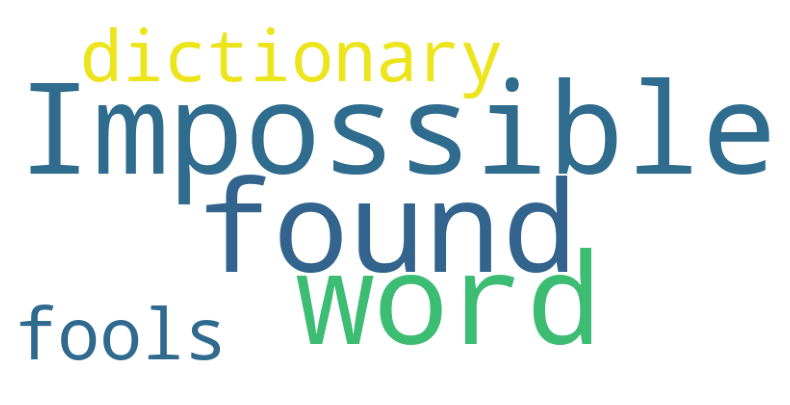

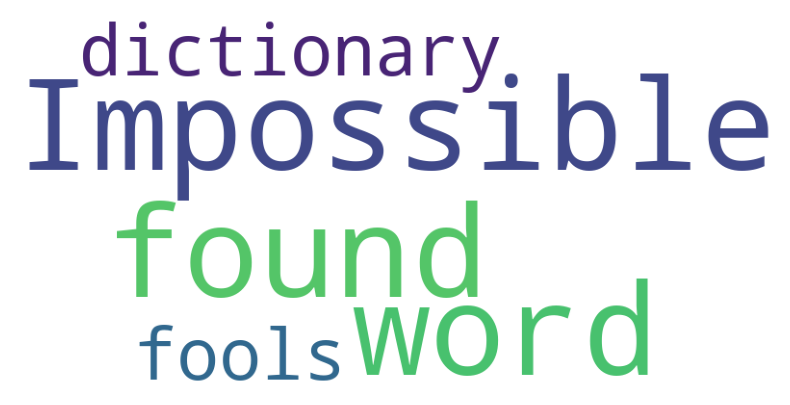

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
some_text = "Impossible is a word to be found only in the dictionary of fools."
for i in stopWords:
    some_text_without_stop_words = some_text.replace(i, "")
# вывести  график облако слов с стоп столвами и без стоп слов
# Создание облака слов
wordcwordcloud_without_stop_words = WordCloud(width=800, height=400, background_color='white').generate(some_text_without_stop_words)
wordcwordcloud_with_stop_words = WordCloud(width=800, height=400, background_color='white').generate(some_text)

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcwordcloud_with_stop_words)
plt.axis('off')
plt.show()
plt.figure(figsize=(10, 5))
plt.imshow(wordcwordcloud_without_stop_words)
plt.axis('off')
plt.show()

### Стемминг
* процесс нахождения основы слова для заданного исходного слова

In [16]:
from nltk.stem import PorterStemmer, SnowballStemmer
words = ["game", "gaming", "gamed", "games", "compacted"]
words_ru = ['корова', 'мальчики', 'мужчины', 'столом', 'убежала']

In [17]:
ps = PorterStemmer()
list(map(ps.stem, words))

['game', 'game', 'game', 'game', 'compact']

In [22]:
# по анолгии стемпинг для русского корпуса (SnowballStemmer)
ss = SnowballStemmer("russian")
list(map(ss.stem, words_ru))

['коров', 'мальчик', 'мужчин', 'стол', 'убежа']

### Лематизация
* процесс приведения словоформы к лемме — её нормальной (словарной) форме

In [23]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

In [31]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(raw)
print(' '.join([token.lemma_ for token in doc]))

DENNIS : listen , strange woman lie in pond distribute sword 
 be no basis for a system of government .   Supreme executive power derive from 
 a mandate from the masse , not from some farcical aquatic ceremony .


In [32]:
[(token.lemma_, token.pos_) for token in doc[:7]]

[('DENNIS', 'PROPN'),
 (':', 'PUNCT'),
 ('listen', 'VERB'),
 (',', 'PUNCT'),
 ('strange', 'ADJ'),
 ('woman', 'NOUN'),
 ('lie', 'VERB')]

### Поиск шаблонов

#### Регулярные выражения

Исчерпывающий пост https://habr.com/ru/post/349860/

In [33]:
re.findall('\d+', 'There is some numbers: 49 and 432')

['49', '432']

In [82]:
re.sub('[,\.?!]',' ','How, to? split. text!').split()

['How', 'to', 'split', 'text']

In [35]:
re.sub('[^A-z]',' ','I 123 can 45 play 67 football').split()

['I', 'can', 'play', 'football']